L'obbiettivo dell'esercizio 8 è quello di stimare il ground state (e l'energia associata) di una Hamiltoniana con potenziale 1-dimensionale: 
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
Indico l'energia di questo stato $\Psi_0(x)$ con $E_0$.  
Per trovare questo stato e questa energia si sfrutta il fatto che:  
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
dove la diseguaglianza è saturata se $\Psi_T(x)=\Psi_0(x)$.  
Dobbiamo quindi risolvere un problema di ottimizzazione minimizzando il funzionale $\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2}$ al variare di $\Psi_T(x)$.  
Poichè non possiamo muoverci liberamente nello spazio delle funzioni $\Psi_T(x)$ (avremmo necessità di ottimizzare infiniti parametri) dobbiamo assumere una forma parametrica per la funzione $\Psi_T(x)$ e cercare il minimo del funzionale al variare dei parametri da cui questa dipende. 
Assumiamo quindi la forma: 
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
dove $\sigma$ e $\mu$ sono i parametri.

La simulazione usa le unità naturali in cui: $\hbar=m=1$ (m massa della particella con Hamiltoniana $\hat H$)

# 8.1

Nel codice è presente un modo per stimare $\langle {\hat H} \rangle_T$, questo sfrutta il fatto che:  
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}   \\=\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \Big(\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2 \Psi_T(x)}{\partial x^2}} }{\Psi_T(x)} + V(x) \Big)
$$
Posso quindi ottenere una stima di $\langle {\hat H} \rangle_T$ mediando i valori di: 
$\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2 \Psi_T(x)}{\partial x^2}} }{\Psi_T(x)} + V(x)$ calcolati usando diverse x estratte con distribuzione:  $\frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}$.  
L'espressione analitica di: $\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2 \Psi_T(x)}{\partial x^2}} }{\Psi_T(x)}$ (in unità naturali) è stata calcolata analiticamente e risulta pari a:  
$$\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2 \Psi_T(x)}{\partial x^2}} }{\Psi_T(x)}=-\frac{1}{2} \frac{ [(\frac{x-\mu}{\sigma^2})^2- \frac{1}{\sigma^2}] e^{- \frac{(x-\mu)^2}{2 \sigma^2}} + [(\frac{x+\mu}{\sigma^2})^2- \frac{1}{\sigma^2}] e^{- \frac{(x+\mu)^2}{2 \sigma^2}} }{\Psi_T(x)} $$  
Per estrarre le x è stato usato l'algoritmo di metropolis. Per proporre le mosse ho usato una distribuzione uniforme nell'intervallo $[x_{old}-\Delta;\  x_{old}+\Delta]$ dove $x_{old}$ rappresenta l'ultima x estratta con l'algoritmo e $\Delta$ è un parametro dato in input al programma.  Vista la forma del potenziale mi è parso naturale iniziare l'algoritmo usando $x=0$.  
Il numero di blocchi ($n_{blk}$) e il numero di step per blocco ($n_{steps(blk)}$) usati per il calcolo di $\langle {\hat H} \rangle_T$ sono anch'essi dati come input .

# 8.2

La minimizzazione dei parametri  $\sigma, \mu$ viene fatta attraverso l'algoritmo: Simulated Annealing. In particolare si è usato l'algorito di Metropolis per generare stati con probabilità $\propto e^{-\beta \langle {\hat H} \rangle_T}$ spostando $\mu$ e $\sigma$ (indipendentemente) di una quantità estratta uniformemente in $[-\Delta'; \Delta' ]$ ($\Delta'$ è un parametro preso come input dal programma).  
Sono state scelte le unità naturali per cui $k_B=1$.  
L'algoritmo richiede di scegliere un set di temperature che si vuole seguire per "raffreddare" il sistema gradualmente.  
Ho usato $n_{temp}$ temperature diverse usando l'andamento:  
$$T_k=T_i \Big( \frac{T_f}{T_i} \Big)^{t_k}$$ 
con $k \in \{0, 1, ... , n_{temp}-1 \}$ 
ed $t_k=k \frac{1}{n_{temp}-1}$.  
In questo modo $T_f$ rappresenta la temperatura finale del sistema e $T_i$ quella iniziale.  
L'andamento della temperatura è stato scelto imponendo:  
$\begin{cases}
T(t)=Ae^{- \lambda T} \\
T(0)\stackrel{!}{=} T_i \\
T(1) \stackrel{!}{=} T_f  
\end{cases}$  
perchè ho pensato potesse essere un raffreddamento abbastanza graduale.  
Nel codice è commentato anche un'altro tipo di andamento che avevo provato:  
$$T_k=\frac{T_f-T_i}{2 \tanh(\frac{1}{2})} \tanh\Big(t_k-\frac{1}{2} \Big)+\frac{1}{2} (T_i+T_f)$$


Ad ogni temperatura ho usato $n_{steps(T)}$ steps montecarlo per muovermi nello spazio dei parametri: $\sigma, \mu$.  Il valore di $n_{steps(T)}$ è dato come input al programma e lo stesso vale per $T_f$ e $T_i$.  
Ogni stima di $\langle {\hat H} \rangle_T$ è stata fatta tentando di equilibrare il sistema usando $n_{eq}$ steps dove $n_{eq}$ viene dato come input del sistema.  Ogni volta che $\mu, \sigma$ vengono modificati $\Delta$ viene cambiata. La stima per capire come adattare $\Delta$ ai nuovi parametri viene fatta, in modo che le mosse con cui viene cambiata la x siano accettate con probabilità vicina al 50%.  Il valore di $\Delta$ dato in input diviene quindi il valore iniziale di questo parametro che varia al variare della $\Psi_T(x)$.

Anche i valori iniziali dei parametri: {$\sigma, \mu$} , ai quali farò riferimento, rispettivamente, come: {$\sigma_i, \mu_i$}, sono dati come input al programma.  

I dati mostrati di seguito sono stati ottenuto con i seguenti parametri:
- $\Delta=0.237$
- $n_{blk}=1000$
- $n_{steps(blk)}=400$
- $n_{eq}=1000$
- $\Delta'=0.5$
- $n_{temp}=1000$
- $T_f=0.001$
- $T_i=1.1$
- $n_{steps(T)}=10$
- $\mu_i=0.05$
- $\sigma_i=0.1$

## Salvataggio dati

In [67]:
# immagazzinamento dati

import matplotlib.pyplot as plt
import numpy as np



param=[] # lista di liste ognuna delle quali sono rispettivamente u e sigma
Temp=[] # temperature
H=[] # <H>
H_err=[] # errori di <H>



with open(f"./OUTPUT/SA.dat", 'r') as file:
	righe=file.read().split("\n")
	for l in righe:
		if(l!=""):
			try:
				# print(l.split("\t"))
				a,b,c,d,e,f,g=l.split() #split() separa se ho cose tra 1 o più spazi vuoti
				# print(i)
				Temp.append(float(a))
				k=[]
				k.append(float(d))
				k.append(float(e))
				param.append(k)
				H.append(float(f))
				H_err.append(float(g))

			except ValueError:
				print(f"Il valore '{l}' non può essere convertito in float.")

# print(param[0])


Il valore '    #T:              iterazioni:              accettazione_<H>:              mu:              sigma:              E_final:              ERROR:' non può essere convertito in float.


## 8.2.1

Considero in questo grafico il numero degli SA steps come $n_{steps(T)} \cdot n_{temp}$

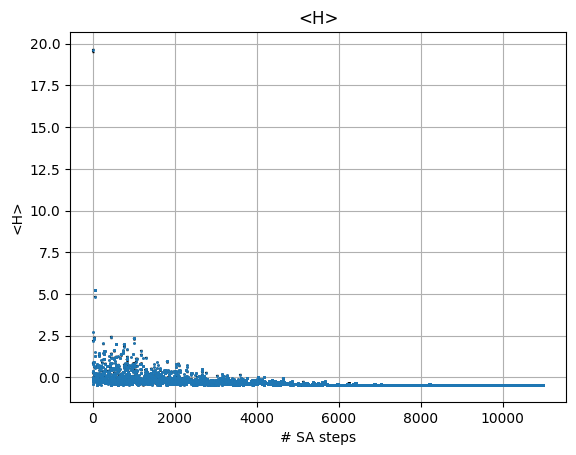

In [68]:
# grafico

SA_steps=vettore = np.arange(len(H))
plt.errorbar(SA_steps, H, np.array(H_err), fmt='o', ecolor='black', capsize=1, markersize=1)	
plt.title("<H>")
plt.xlabel("# SA steps")
plt.ylabel("<H>")
plt.grid(True)
plt.show()

Come ci si aspetta il sistema diviene sempre meno ergodico man mano che la temperatura diminuisce, infatti inizialmente il valore di $\langle {\hat H} \rangle_T$ assume valori molto diversi mentre quando la temperatura è bassa il sistema si è "raffreddato" nella configurazione corrispondente alla miglior stima del ground state.

## 8.2.2

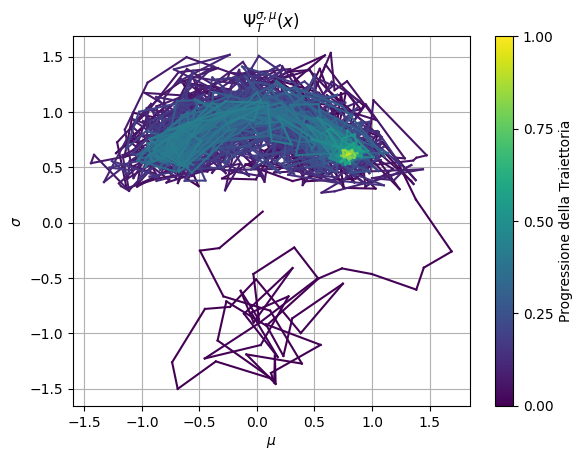

In [69]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = zip(*param)


# Creazione di un array che rappresenta la progressione dei punti
progress = np.linspace(0, 1, len(param))

# Creazione della colormap
cmap = plt.get_cmap('viridis')

# Colori basati sulla progressione dei punti
colors = cmap(progress)

fig, ax = plt.subplots()

# Disegna la traiettoria con un gradiente di colore
for i in range(len(param) - 1):
    plt.plot(mu[i:i+2], sigma[i:i+2], color=colors[i])
    
# Disegna la barra di colori
cb = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax)  # barra di colori
cb.set_label('Progressione della Traiettoria')
cb.set_ticks(np.linspace(0, 1, 5)) # Impostati solo 5 tick per la barra di colori


# Aggiungi un titolo e le etichette agli assi
ax.set_title('$\Psi_T^{\sigma,\mu}(x)$')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')

# Mostra la griglia
ax.grid(True)

# Visualizza la traiettoria
plt.show()

Anche in questo caso si vede la progressiva perdita di ergodicità del sistema. Infatti l'algoritmo si specializza, man mano che la temperatura diminuisce, in una regione dello spazio dei parametri dove stima si possa trovare il minimo.

## 8.2.3

In [70]:
# immagazzinamento dati:


import matplotlib.pyplot as plt
import numpy as np



blk=[] # temperature
H_blk=[] # <H>
H_blk_err=[] # errori di <H>



with open(f"./OUTPUT/total_energy.dat", 'r') as file:
	righe=file.read().split("\n")
	for l in righe:
		if(l!=""):
			try:
				# print(l.split("\t"))
				a,b,c,d=l.split() #split() separa se ho cose tra 1 o più spazi vuoti
				# print(i)
				blk.append(int(a))
				H_blk.append(float(c))
				H_blk_err.append(float(d))

			except ValueError:
				print(f"Il valore '{l}' non può essere convertito in float.")



Il valore '    # BLOCK:          ACTUAL_TE:              TE_AVE:              ERROR:' non può essere convertito in float.


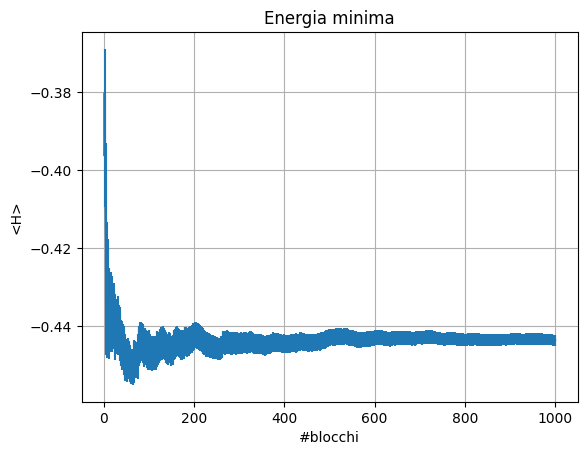

<IPython.core.display.Math object>

In [71]:
# grafico

from IPython.display import display, Math

plt.errorbar(blk, H_blk, np.array(H_blk_err))	
plt.title("Energia minima")
plt.xlabel("#blocchi")
plt.ylabel("<H>")
plt.grid(True)
plt.show()
# print(min(H_blk))
# print(f"il numero di deviazioni standard di differenza tra dati e valori aspettati sono:\n {H_blk_err}")
latex_string = fr"$E_{{\text{{min}}}}={H_blk[len(H_blk)-1]} \pm {H_blk_err[len(H_blk_err)-1]}$"
display(Math(latex_string))

l'energia da noi trovata è simile ma differisce dall'energia del ground state:  
$E_0=-0.4604658796925906$.  
Questo è ragionevole in quanto lo stato da noi campionato non è quella del ground state ma una sua approssimazione.

## 8.2.4

### salvataggio dati

In [73]:
# immagazzinamento dati di psi

import matplotlib.pyplot as plt
import numpy as np


x=[]
with open(f"./OUTPUT/ground_state.dat", 'r') as file:
	righe=file.read().split("\n")
	for l in righe:
		if(l!=""):
			try:
				a,b=l.split()
				# step.append(a)
				x.append(float(b))

			except ValueError:
				print(f"Il valore '{l}' non può essere convertito in float.")


Il valore '      # steps:             x:' non può essere convertito in float.


## grafico

Per fare questo grafico è stata calcolata la normalizzazione della funzione:  
$\Psi_T(x)=N\Big( e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}} \Big)$.  
Imponendo: $\int_{-\infty}^{+\infty} |\Psi_T(x)|^2 dx \stackrel{!}{=}1$ ho trovato:  
$N^{-2}=2 \sigma \sqrt{\pi} \Big(1.+e^{-(\frac{\mu}{\sigma})^2} \Big)$.

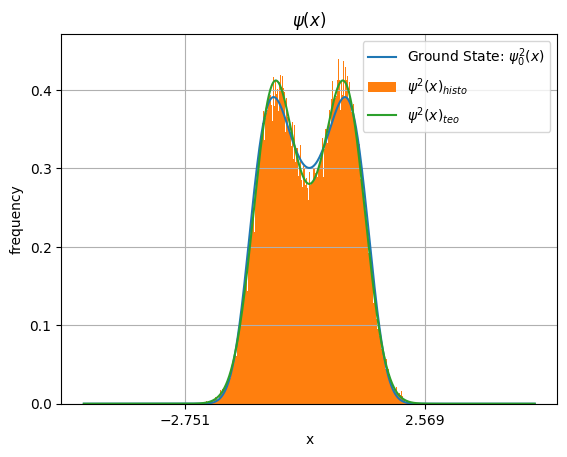

In [75]:
# grafico


u_teo=param[len(param)-1][0]
s_teo=param[len(param)-1][1]


# ground state

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations


x_ = np.linspace(-a/2, a/2, N)
dx = x_[1] - x_[0] # the step size
V = Vpot(x_)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
Hamiltonian = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(Hamiltonian)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

plt.plot(x_,(psi[0])**2, label='Ground State: $\psi_0^2(x)$')

# istogramma

plt.hist(x, bins=500, density=True, label='$\psi^2(x)_{histo}$') # il parametro density se impostrato su true normalizza l'istogramma
plt.xticks([min(x), max(x)]) # scrive solo cordinate di primo e ultimo bin



# funzione teorica

def prob_teo(t): # probabilità teorica campionata con il metropolis per ottenere l'istogramma
    N=2.*s_teo*np.sqrt(np.pi)*(1.+np.exp(-(u_teo/s_teo)**2)) # norma della funzione dataci
    return (((np.exp((-(x_-u_teo)**2.)/(2.*(s_teo**2)))+np.exp((-(x_+u_teo)**2.)/(2.*(s_teo**2.))))**2.)/N)


vec_teo=[]
for i in x_:
    vec_teo.append(prob_teo(i))
plt.plot(x_,vec_teo[0], label='$\psi^2(x)_{teo}$')


plt.title(r'$\psi(x)$')
plt.xlabel("x")
plt.grid(True)
plt.ylabel('frequency')

plt.legend()
plt.show()
# print(s_teo)


Come si vede l'algoritmo di metropolis ha effettivamente campionato secondo la distribuzione assegnatagli ($\Psi^2(x)_{teo}$) questo campionamento tuttavia differesci dalla distribuzione effettiva del ground state ($\Psi_0^2(x)$) in quanto il nostro codice non si muove in tutto lo spazio funzionale, ma nel sottospazio: 
$$
\Big\{ \Psi_T^{\sigma,\mu}(x) \ \big| \ \Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}} \Big\}_{\{\sigma,\mu \}}
$$  